In [121]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

dataset: https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression

In [122]:
data_x = pd.read_csv("manufacturing.csv")
data_x = (data_x - data_x.min()) / (data_x.max() - data_x.min())

<Axes: >

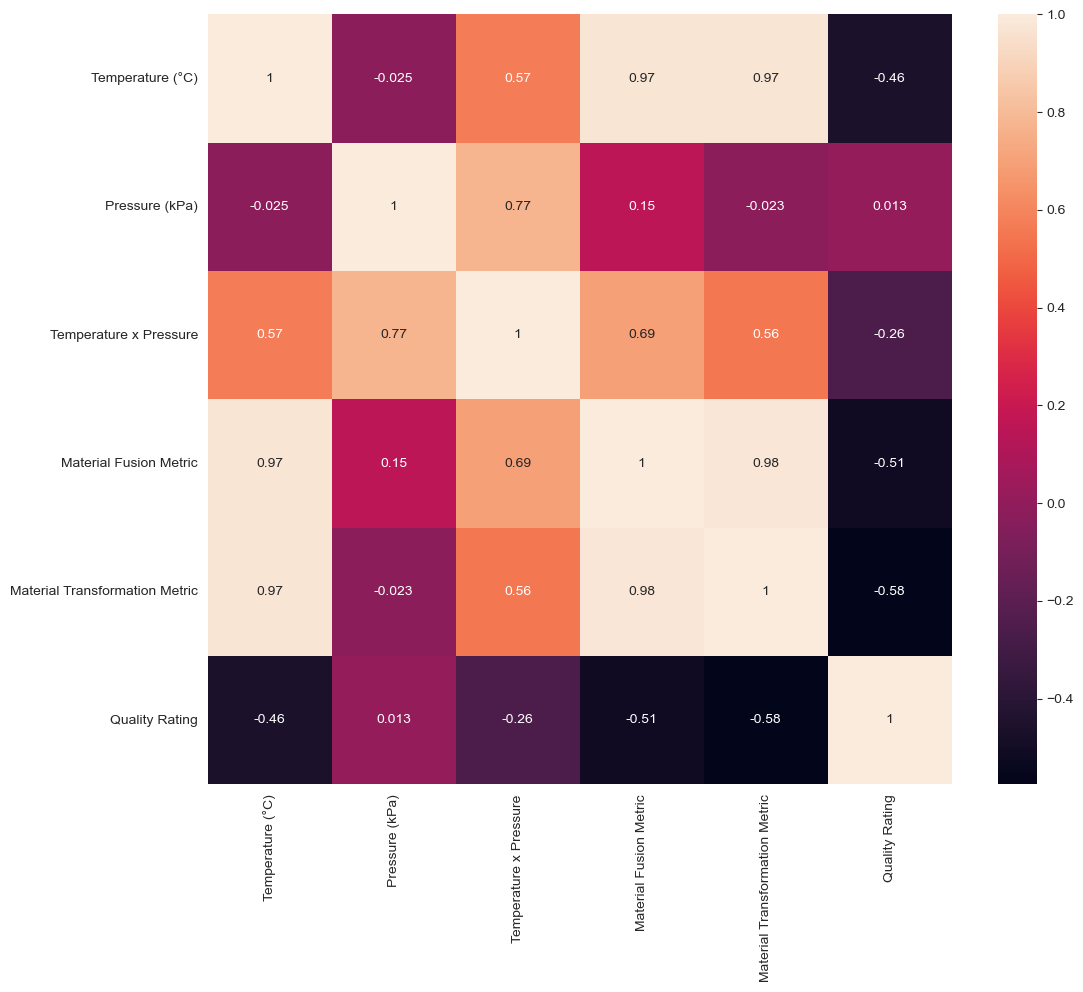

In [123]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_x.corr(), annot=True)

In [124]:
data_x.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000
mean,0.500155,0.490723,0.356372,0.405668,0.347586,0.962224
std,0.290710,0.288658,0.212839,0.254406,0.292307,0.131235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254312,0.234544,0.187488,0.186646,0.093618,0.999405
50%,0.492998,0.491573,0.315935,0.368107,0.262846,1.000000
75%,0.756842,0.737477,0.498496,0.615908,0.572453,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
data_x = data_x.drop(['Pressure (kPa)', 'Temperature x Pressure'], axis=1)

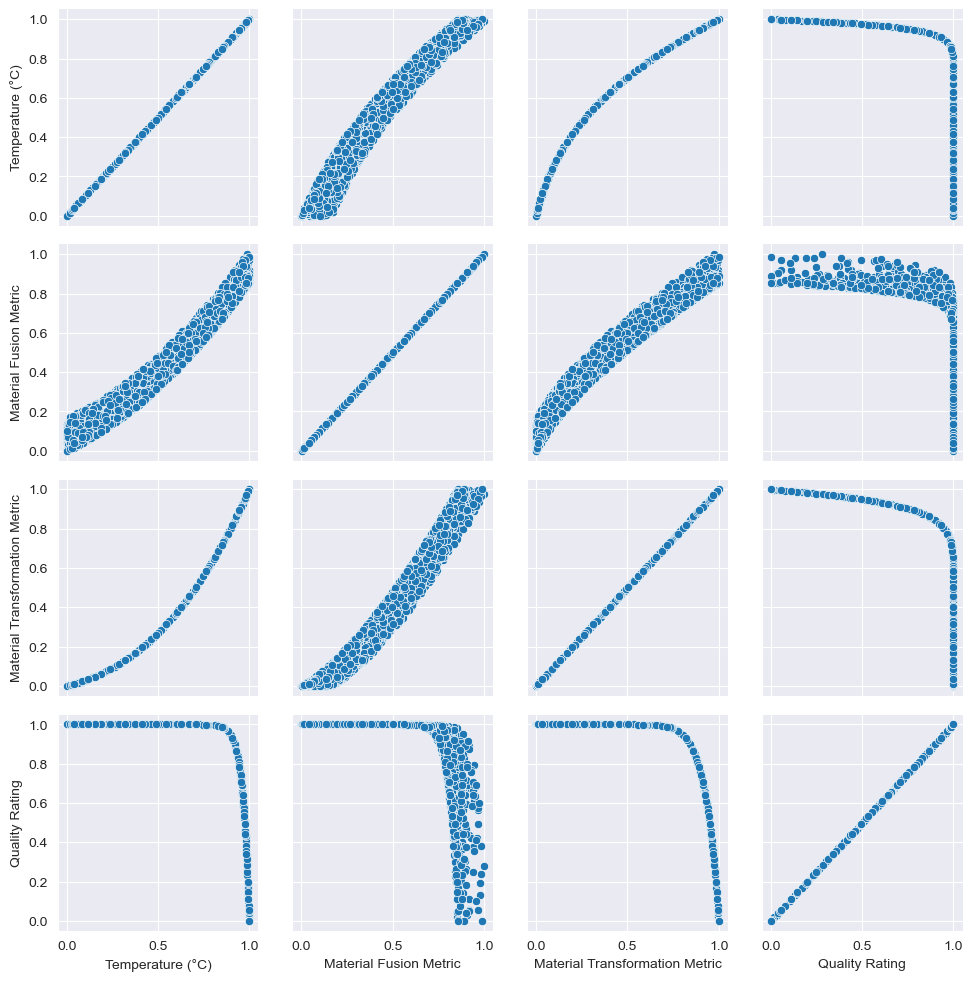

In [126]:
pair_grid = sns.PairGrid(data_x)
pair_grid.map(sns.scatterplot)

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x.drop(['Quality Rating'], axis=1), data_x['Quality Rating'],test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=4)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_prediction = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean squared error", mse)
print("Mean absolute error", mae)
print("R2 score", r2)

Mean squared error 2.604435173760637e-06
Mean absolute error 0.0012535145759079921
R2 score 0.99987496452011


In [155]:
x_train, x_test, y_train, y_test = train_test_split(data_x.drop(['Temperature (°C)','Material Transformation Metric','Quality Rating'], axis=1), data_x['Quality Rating'],test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=4)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_prediction = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean squared error", mse)
print("Mean absolute error", mae)
print("R2 score", r2)

Mean squared error 0.006327920177994888
Mean absolute error 0.029526256319720064
R2 score 0.6962049414274933


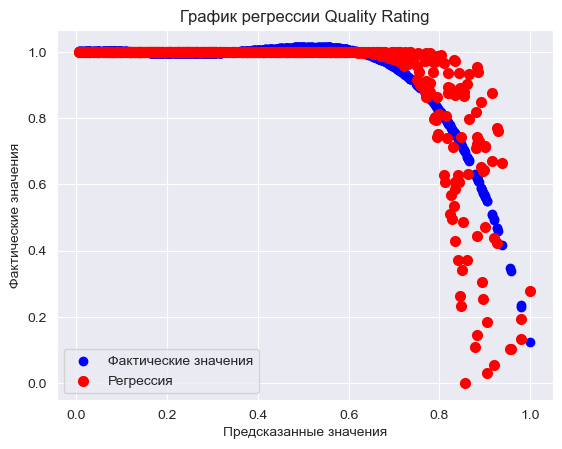

In [157]:
plt.scatter(x_test['Material Fusion Metric'], y_prediction, color='blue', label='Фактические значения')
plt.scatter(x_test['Material Fusion Metric'], y_test, color='red', linewidth=2, label='Регрессия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('График регрессии Quality Rating')
plt.legend()
plt.show()


In [158]:
x_train, x_test, y_train, y_test = train_test_split(data_x.drop(['Temperature (°C)','Material Fusion Metric','Quality Rating'], axis=1), data_x['Quality Rating'],test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=4)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_prediction = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean squared error", mse)
print("Mean absolute error", mae)
print("R2 score", r2)

Mean squared error 0.0007486906812121262
Mean absolute error 0.018519050551318184
R2 score 0.9640563529637318


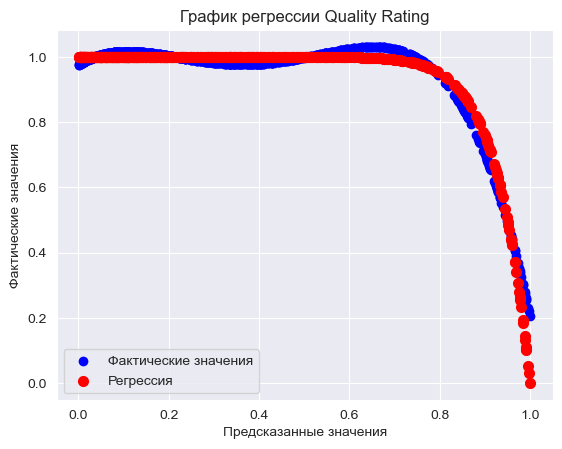

In [159]:
plt.scatter(x_test['Material Transformation Metric'], y_prediction, color='blue', label='Фактические значения')
plt.scatter(x_test['Material Transformation Metric'], y_test, color='red', linewidth=2, label='Регрессия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('График регрессии Quality Rating')
plt.legend()
plt.show()

In [161]:
x_train, x_test, y_train, y_test = train_test_split(data_x.drop(['Material Transformation Metric','Material Fusion Metric', 'Quality Rating'], axis=1), data_x['Quality Rating'],test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=4)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_prediction = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean squared error", mse)
print("Mean absolute error", mae)
print("R2 score", r2)

Mean squared error 0.0034377502361920293
Mean absolute error 0.03686830057804267
R2 score 0.834958168721317


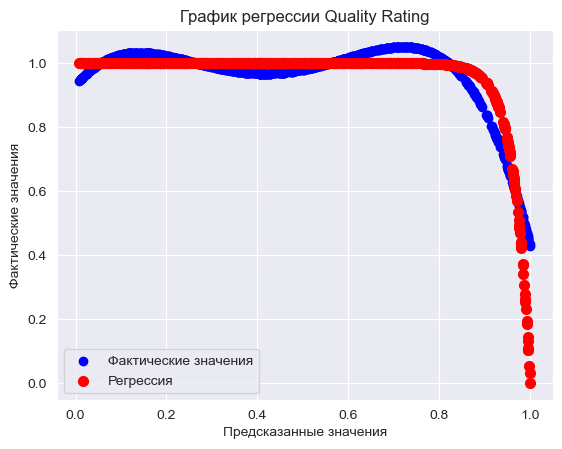

In [162]:
plt.scatter(x_test['Temperature (°C)'], y_prediction, color='blue', label='Фактические значения')
plt.scatter(x_test['Temperature (°C)'], y_test, color='red', linewidth=2, label='Регрессия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('График регрессии Quality Rating')
plt.legend()
plt.show()

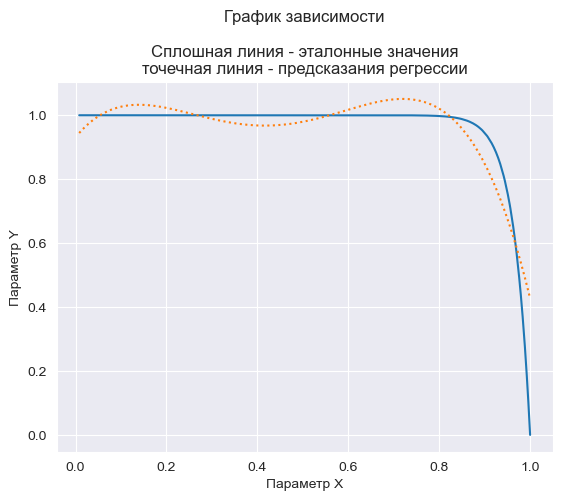

In [163]:
sns.lineplot(
    x=x_test['Temperature (°C)'],
    y=y_test,
    linestyle="solid"
)
sns.lineplot(
    x=x_test['Temperature (°C)'],
    y=y_prediction,
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()